Basé sur le blog: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
et aussi sur: https://techblog.appnexus.com/a-keras-multithreaded-dataframe-generator-for-millions-of-image-files-84d3027f6f43

Le jeu de données provient de : https://www.kaggle.com/c/dogs-vs-cats/data

Cependant, on va utiliser seulement 400 images pour le jeu d'entrainement (*train*) et 100 images pour le jeu de validation (*validation*) contrairement aux 60 000 images.


Note: pour des questions sur google colaboratory, voir https://stackoverflow.com/questions/tagged/google-colaboratory

In [1]:
# Téléchargement des données sur colaboratory
!wget -O data.zip https://github.com/etiennelord/tutoriel_agriculture/blob/master/small_cat_and_dog_500.zip?raw=true
!ls
!unzip data.zip
!ls

--2018-04-24 13:35:50--  https://github.com/etiennelord/tutoriel_agriculture/blob/master/small_cat_and_dog_500.zip?raw=true
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/etiennelord/tutoriel_agriculture/raw/master/small_cat_and_dog_500.zip [following]
--2018-04-24 13:35:50--  https://github.com/etiennelord/tutoriel_agriculture/raw/master/small_cat_and_dog_500.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/etiennelord/tutoriel_agriculture/master/small_cat_and_dog_500.zip [following]
--2018-04-24 13:35:51--  https://raw.githubusercontent.com/etiennelord/tutoriel_agriculture/master/small_cat_and_dog_500.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent


  inflating: small_cat_and_dog/train/dog/dog.243.jpg  
  inflating: small_cat_and_dog/train/dog/dog.244.jpg  
  inflating: small_cat_and_dog/train/dog/dog.245.jpg  
  inflating: small_cat_and_dog/train/dog/dog.246.jpg  
  inflating: small_cat_and_dog/train/dog/dog.247.jpg  
  inflating: small_cat_and_dog/train/dog/dog.248.jpg  
  inflating: small_cat_and_dog/train/dog/dog.249.jpg  
  inflating: small_cat_and_dog/train/dog/dog.25.jpg  
  inflating: small_cat_and_dog/train/dog/dog.250.jpg  
  inflating: small_cat_and_dog/train/dog/dog.251.jpg  
  inflating: small_cat_and_dog/train/dog/dog.252.jpg  
  inflating: small_cat_and_dog/train/dog/dog.253.jpg  
  inflating: small_cat_and_dog/train/dog/dog.254.jpg  
  inflating: small_cat_and_dog/train/dog/dog.255.jpg  
  inflating: small_cat_and_dog/train/dog/dog.256.jpg  
  inflating: small_cat_and_dog/train/dog/dog.257.jpg  
  inflating: small_cat_and_dog/train/dog/dog.258.jpg  
  inflating: small_cat_and_dog/train/dog/dog.259.jpg  
  inflatin

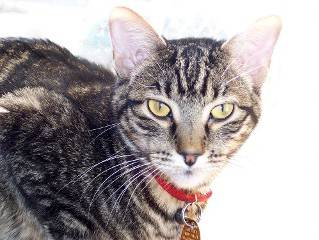

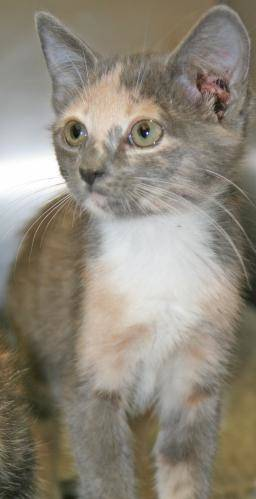

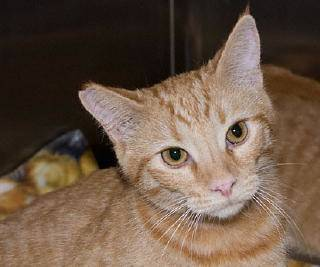

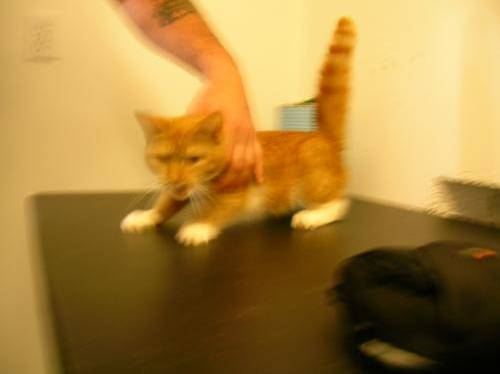

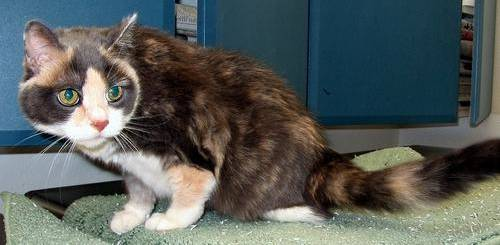

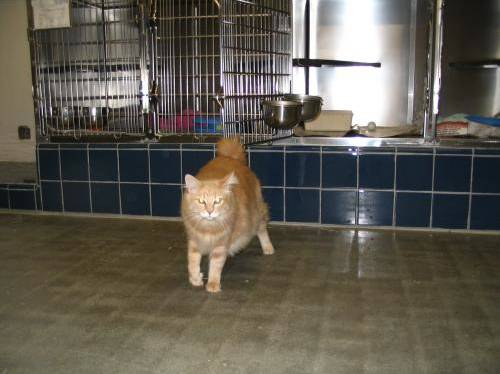

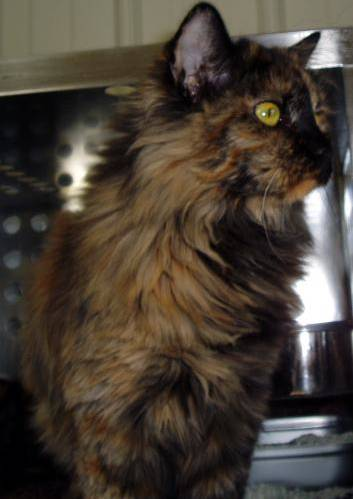

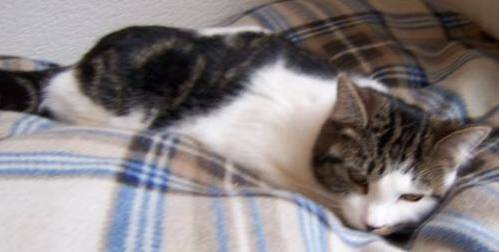

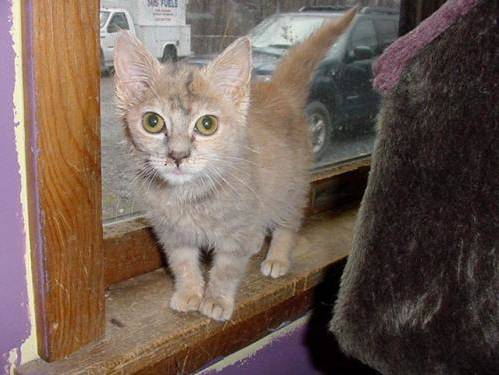

In [2]:
# Voir quelques images
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, HTML, display
%matplotlib inline

for img_path in glob.glob('small_cat_and_dog/train/cat/*.jpg')[1:10]:
    display(Image(img_path))


In [3]:
################################################################################ 
# Exemple de création d'un générateur permettant d'augmenter le jeu de données #
################################################################################ 
!rm -rf preview
!mkdir preview
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('small_cat_and_dog/train/cat/cat.1.jpg')  # Image de base
x = img_to_array(img)  # Transformation de l'image en un tableau numérique
x = x.reshape((1,) + x.shape) 

# La commande .flow() permet de générer autant 
# d'image que l'on veut...
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpg'):
    i += 1
    if i > 5:
        break  # On arrête après 5 images.

Using TensorFlow backend.


In [4]:
################################################################################ 
# Fichiers générés                                                             #
################################################################################ 
!ls preview

cat_0_3075.jpg	cat_0_3526.jpg	cat_0_6210.jpg
cat_0_3479.jpg	cat_0_4489.jpg	cat_0_6965.jpg


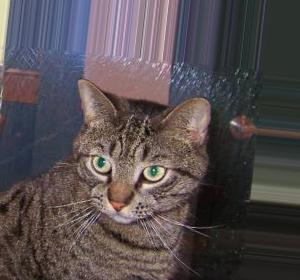

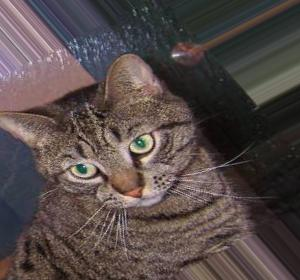

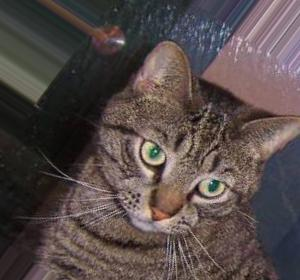

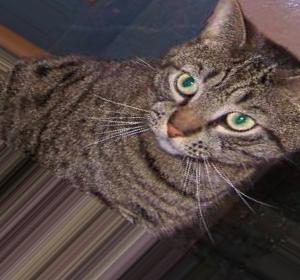

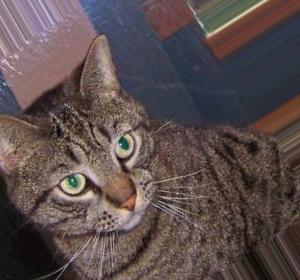

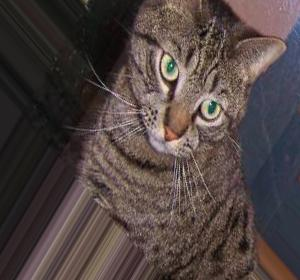

In [5]:
################################################################################ 
# Affichage des images                                                         #
################################################################################ 
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, HTML, display
%matplotlib inline

for img_path in glob.glob('preview/cat*.jpg'):
    display(Image(img_path))

In [6]:
################################################################################ 
# Réseau neuronal convolutif                                                   #
################################################################################ 

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions des images d'entraînement
img_width, img_height = 150, 150

################################################################################ 
# DÉFINITION DES DONNÉES D'ENTRÉE                                              #
################################################################################
train_data_dir = 'small_cat_and_dog/train'
validation_data_dir = 'small_cat_and_dog/validation'
nb_train_samples = 400      # Nombre d'images d'entraînement
nb_validation_samples = 100 # Nombre d'images de validation
epochs = 50     # Nombre d'itérations
batch_size = 16 # Nombre d'images à la fois

# Ici, c'est seulement pour dire au logiciel si on utilise tensorflow ou theano qui n'ont pas le même format d'entrée
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

    
################################################################################ 
# LE MODÈLE DU RÉSEAU DE CONVOLUTION                                           #
################################################################################
model = Sequential() # Type du modèle
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dernières couches
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # Dropout
model.add(Dense(1)) # Une cellule finale
model.add(Activation('sigmoid'))

################################################################################ 
# DÉFINITION DE L'OPTIMISATION                                                 #
################################################################################

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


model.summary() # Visualisation du modèle


################################################################################ 
# DÉFINITION DE L'AUGMENTATION DES IMAGES                                      #
################################################################################

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255) # On normalise les images

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

original_hist=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

################################################################################ 
# SAUVEGARDE DU RÉSEAU ENTRAINÉ                                                #
################################################################################
model.save_weights('monclassificateur.h5')
# On peut charger avec model.load_weights('')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

25/25 [==============================] - 4s 153ms/step - loss: 0.6940 - acc: 0.5075 - val_loss: 0.6914 - val_acc: 0.5312
Epoch 3/50
25/25 [==============================] - 4s 163ms/step - loss: 0.6953 - acc: 0.4882 - val_loss: 0.6926 - val_acc: 0.6042
Epoch 4/50
25/25 [==============================] - 4s 154ms/step - loss: 0.6935 - acc: 0.5350 - val_loss: 0.7047 - val_acc: 0.4688
Epoch 5/50
25/25 [==============================] - 4s 164ms/step - loss: 0.6957 - acc: 0.5100 - val_loss: 0.6896 - val_acc: 0.5417
Epoch 6/50
25/25 [==============================] - 4s 155ms/step - loss: 0.6975 - acc: 0.5175 - val_loss: 0.6786 - val_acc: 0.5729
Epoch 7/50
25/25 [==============================] - 4s 154ms/step - loss: 0.6840 - acc: 0.5950 - val_loss: 0.6659 - val_acc: 0.5938
Epoch 8/50
25/25 [==============================] - 4s 154ms/step - loss: 0.7313 - acc: 0.5783 - val_loss: 0.6483 - val_acc: 0.6042
Epoch 9/50
23/25 [==========================>...] - ETA: 0s - loss: 0.6642 - acc: 0.595

25/25 [==============================] - 4s 156ms/step - loss: 0.6678 - acc: 0.5875 - val_loss: 0.6665 - val_acc: 0.5625
Epoch 10/50
25/25 [==============================] - 4s 153ms/step - loss: 0.6611 - acc: 0.5876 - val_loss: 0.6322 - val_acc: 0.6042
Epoch 11/50
25/25 [==============================] - 4s 159ms/step - loss: 0.6752 - acc: 0.6000 - val_loss: 0.6234 - val_acc: 0.6875
Epoch 12/50
25/25 [==============================] - 4s 155ms/step - loss: 0.6634 - acc: 0.6051 - val_loss: 0.6202 - val_acc: 0.6667
Epoch 13/50
25/25 [==============================] - 4s 160ms/step - loss: 0.6656 - acc: 0.6075 - val_loss: 0.6178 - val_acc: 0.7083
Epoch 14/50
25/25 [==============================] - 4s 155ms/step - loss: 0.6327 - acc: 0.6752 - val_loss: 0.6044 - val_acc: 0.6250
Epoch 15/50
25/25 [==============================] - 4s 159ms/step - loss: 0.6266 - acc: 0.6700 - val_loss: 0.6066 - val_acc: 0.6667
Epoch 16/50
24/25 [===========================>..] - ETA: 0s - loss: 0.6499 - acc

25/25 [==============================] - 4s 152ms/step - loss: 0.6511 - acc: 0.6202 - val_loss: 0.6131 - val_acc: 0.6042
Epoch 17/50
25/25 [==============================] - 4s 153ms/step - loss: 0.6240 - acc: 0.6720 - val_loss: 0.6075 - val_acc: 0.6458
Epoch 18/50
25/25 [==============================] - 4s 157ms/step - loss: 0.5969 - acc: 0.6675 - val_loss: 0.6005 - val_acc: 0.5938
Epoch 19/50
25/25 [==============================] - 4s 155ms/step - loss: 0.6250 - acc: 0.6477 - val_loss: 0.5909 - val_acc: 0.6875
Epoch 20/50
25/25 [==============================] - 4s 157ms/step - loss: 0.6230 - acc: 0.6675 - val_loss: 0.6039 - val_acc: 0.6771
Epoch 21/50
25/25 [==============================] - 4s 161ms/step - loss: 0.6235 - acc: 0.6775 - val_loss: 0.5762 - val_acc: 0.6875
Epoch 22/50
25/25 [==============================] - 4s 153ms/step - loss: 0.6003 - acc: 0.6828 - val_loss: 0.5978 - val_acc: 0.6354
Epoch 23/50
22/25 [=========================>....] - ETA: 0s - loss: 0.5784 - acc

25/25 [==============================] - 4s 159ms/step - loss: 0.5845 - acc: 0.7250 - val_loss: 0.6300 - val_acc: 0.6458
Epoch 24/50
25/25 [==============================] - 4s 153ms/step - loss: 0.5803 - acc: 0.6971 - val_loss: 0.6086 - val_acc: 0.6979
Epoch 25/50
25/25 [==============================] - 4s 160ms/step - loss: 0.5853 - acc: 0.6950 - val_loss: 0.6032 - val_acc: 0.6979
Epoch 26/50
25/25 [==============================] - 4s 153ms/step - loss: 0.5784 - acc: 0.6978 - val_loss: 0.5913 - val_acc: 0.6979
Epoch 27/50
25/25 [==============================] - 4s 157ms/step - loss: 0.5689 - acc: 0.7200 - val_loss: 0.5788 - val_acc: 0.6979
Epoch 28/50
25/25 [==============================] - 4s 159ms/step - loss: 0.5536 - acc: 0.6925 - val_loss: 0.5893 - val_acc: 0.6979
Epoch 29/50
25/25 [==============================] - 4s 157ms/step - loss: 0.6044 - acc: 0.6727 - val_loss: 0.5785 - val_acc: 0.7083
Epoch 30/50
22/25 [=========================>....] - ETA: 0s - loss: 0.5815 - acc

25/25 [==============================] - 4s 157ms/step - loss: 0.5692 - acc: 0.7025 - val_loss: 0.6431 - val_acc: 0.7083
Epoch 31/50
25/25 [==============================] - 4s 149ms/step - loss: 0.5837 - acc: 0.7192 - val_loss: 0.5635 - val_acc: 0.7083
Epoch 32/50
25/25 [==============================] - 4s 160ms/step - loss: 0.5261 - acc: 0.7625 - val_loss: 0.5742 - val_acc: 0.6979
Epoch 33/50
25/25 [==============================] - 4s 161ms/step - loss: 0.5147 - acc: 0.7575 - val_loss: 0.5953 - val_acc: 0.6979
Epoch 34/50
25/25 [==============================] - 4s 153ms/step - loss: 0.5970 - acc: 0.7121 - val_loss: 0.5847 - val_acc: 0.7188
Epoch 35/50
25/25 [==============================] - 4s 157ms/step - loss: 0.5782 - acc: 0.7125 - val_loss: 0.5900 - val_acc: 0.6875
Epoch 36/50
25/25 [==============================] - 4s 152ms/step - loss: 0.5480 - acc: 0.7421 - val_loss: 0.7965 - val_acc: 0.6146
Epoch 37/50
23/25 [==========================>...] - ETA: 0s - loss: 0.5152 - acc

25/25 [==============================] - 4s 160ms/step - loss: 0.5120 - acc: 0.7550 - val_loss: 0.6507 - val_acc: 0.6771
Epoch 38/50
25/25 [==============================] - 4s 149ms/step - loss: 0.5231 - acc: 0.7572 - val_loss: 0.5928 - val_acc: 0.7083
Epoch 39/50
25/25 [==============================] - 4s 162ms/step - loss: 0.5553 - acc: 0.7125 - val_loss: 0.5963 - val_acc: 0.6562
Epoch 40/50
25/25 [==============================] - 4s 157ms/step - loss: 0.5072 - acc: 0.7500 - val_loss: 0.5889 - val_acc: 0.7396
Epoch 41/50
25/25 [==============================] - 4s 153ms/step - loss: 0.5701 - acc: 0.7253 - val_loss: 0.5504 - val_acc: 0.7500
Epoch 42/50
25/25 [==============================] - 4s 157ms/step - loss: 0.5014 - acc: 0.7675 - val_loss: 0.5602 - val_acc: 0.7188
Epoch 43/50
25/25 [==============================] - 4s 152ms/step - loss: 0.5009 - acc: 0.7253 - val_loss: 0.6191 - val_acc: 0.7083
Epoch 44/50
23/25 [==========================>...] - ETA: 0s - loss: 0.5485 - acc

25/25 [==============================] - 4s 152ms/step - loss: 0.5353 - acc: 0.7672 - val_loss: 0.8128 - val_acc: 0.6979
Epoch 45/50
25/25 [==============================] - 4s 161ms/step - loss: 0.4998 - acc: 0.7825 - val_loss: 0.6091 - val_acc: 0.6979
Epoch 46/50
25/25 [==============================] - 4s 157ms/step - loss: 0.5053 - acc: 0.7550 - val_loss: 0.5560 - val_acc: 0.7188
Epoch 47/50
25/25 [==============================] - 4s 155ms/step - loss: 0.5055 - acc: 0.7622 - val_loss: 0.6515 - val_acc: 0.6875
Epoch 48/50
25/25 [==============================] - 4s 153ms/step - loss: 0.4741 - acc: 0.7747 - val_loss: 0.5998 - val_acc: 0.7292
Epoch 49/50
25/25 [==============================] - 4s 160ms/step - loss: 0.4743 - acc: 0.7725 - val_loss: 0.7834 - val_acc: 0.6250
Epoch 50/50
25/25 [==============================] - 4s 149ms/step - loss: 0.4548 - acc: 0.7797 - val_loss: 0.5607 - val_acc: 0.7396


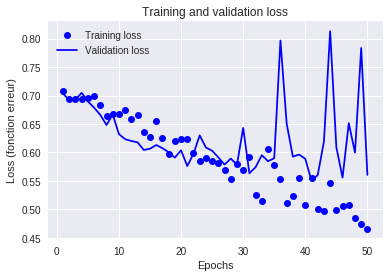

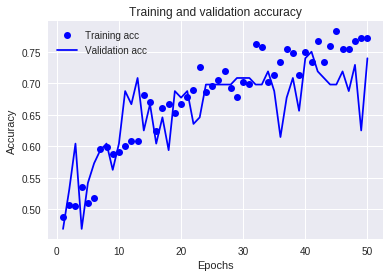

In [7]:

################################################################################ 
# VISUALISATION DES RÉSULTATS D'ENTRAÎNEMENT                                   #
################################################################################

import matplotlib.pyplot as plt
original_hist.history

acc = original_hist.history['acc']
val_acc = original_hist.history['val_acc']
loss = original_hist.history['loss']
val_loss = original_hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (fonction erreur)')
plt.legend()

plt.show()

plt.clf()   # Création d'une nouvelle figure
acc_values = original_hist.history['acc']
val_acc_values = original_hist.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

chat1.jpg  chat2.JPG  chat3.JPG  kangourou.jpg


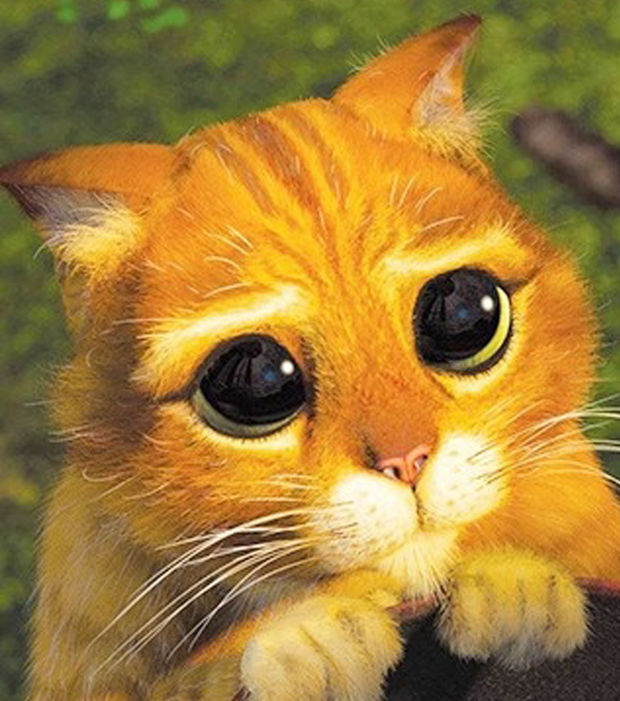

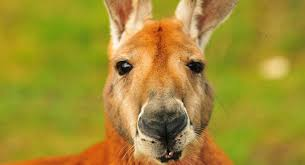

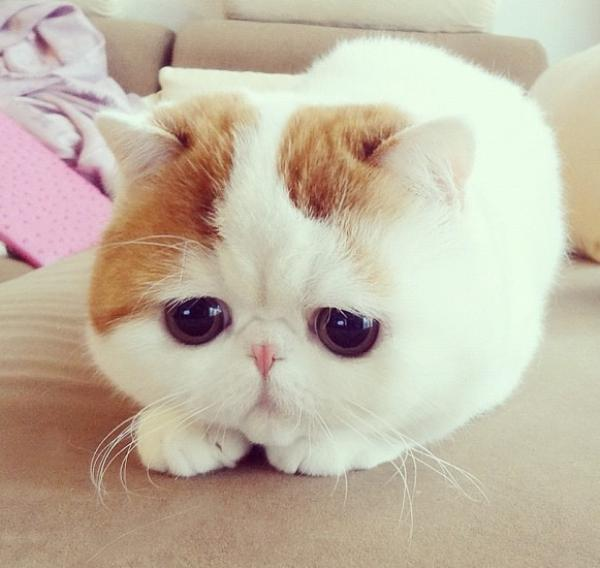

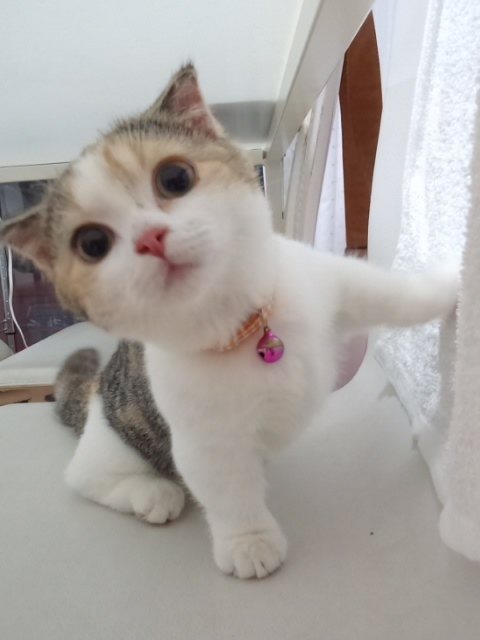

In [0]:
################################################################################
# PRÉDICTION DE QUELQUES IMAGES  (Visualisation des images)                    #
################################################################################
!ls small_cat_and_dog/test/
for img_path in glob.glob('small_cat_and_dog/test/*'):
    display(Image(img_path))

{'dog': 1, 'cat': 0}


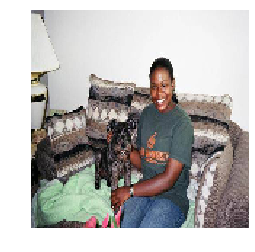

[[0.79054594]]


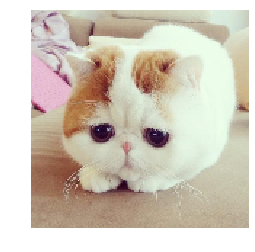

[[0.64149815]]


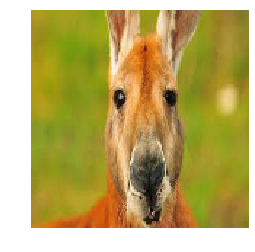

[[0.9986959]]


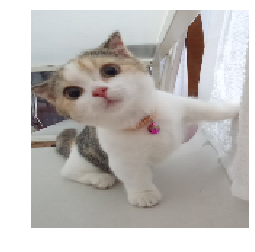

[[0.12942839]]


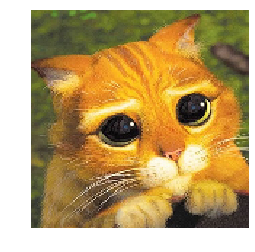

[[0.88515025]]


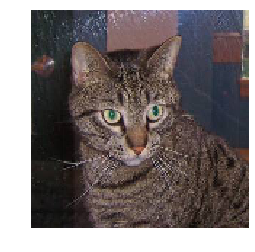

[[0.30401626]]


In [9]:

################################################################################
# PRÉDICTION DE QUELQUES IMAGES  (Code)                                        #
################################################################################

from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

################################################################################
# Fonction pour charger des images en mémoire                                  #
################################################################################
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels) i.e.  (batch_size, height, width, channels)
    img_tensor /= 255.                                      # On normalise les images [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

  
################################################################################
# Affichage des catégories d'images                                            #
################################################################################  
print(train_generator.class_indices)

# Image 1
new_image = load_image('small_cat_and_dog/train/dog/dog.59.jpg', True)
pred = model.predict(new_image) # Prédiction 
print(pred)

# Image 2
new_image = load_image('small_cat_and_dog/test/chat2.JPG', True)
pred = model.predict(new_image)
print(pred)

# Image 3
new_image = load_image('small_cat_and_dog/test/kangourou.jpg', True)
pred = model.predict(new_image)
print(pred)

# Image 4
new_image = load_image('small_cat_and_dog/test/chat3.JPG', True)
pred = model.predict(new_image)
print(pred)

# Image 5
new_image = load_image('small_cat_and_dog/test/chat1.jpg', True)
pred = model.predict(new_image)
print(pred)


new_image = load_image('small_cat_and_dog/train/cat/cat.1.jpg', True)
pred = model.predict(new_image)
print(pred)

In [11]:
################################################################################
# Code pour du 'Tranfert' learning                                             #
################################################################################
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model_resnet = ResNet50(weights='imagenet') #Définition du modèle ResNet50

#ResNet-50
#Authors: Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
#https://arxiv.org/abs/1512.03385


# Prédiction de l'image du Chat Potté de Shrek
img = image.load_img('small_cat_and_dog/test/chat1.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model_resnet.predict(x)
# Décodage des résultats
print('Predicted ResNet50:', decode_predictions(preds, top=3)[0])


49152/35363 [=========================================] - 0s 0us/step
('Predicted ResNet50:', [(u'n02123045', u'tabby', 0.2862445), (u'n02123159', u'tiger_cat', 0.14608775), (u'n02123394', u'Persian_cat', 0.09975063)])


**Liste de modèles déjà entrainés:**

https://github.com/fchollet/deep-learning-models/releases

https://keras.rstudio.com/articles/applications.html

**Voir aussi ce qu'on peut faire avec ce genre de données:**

https://blog.keras.io/index.html

**Encore, aller un peu plus loin:**

https://gist.github.com/fchollet/f35fbc80e066a49d65f1688a7e99f069#file-classifier_from_little_data_script_2-py

https://gist.github.com/fchollet/7eb39b44eb9e16e59632d25fb3119975#file-classifier_from_little_data_script_3-py




In [0]:
################################################################################ 
# SAUVEGARDE DU RÉSEAU ENTRAINÉ DANS NOTRE GOOGLE.DRIVE                        #
################################################################################
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Code pour télécharger notre modèle
uploaded = drive.CreateFile({'title': 'monclassificateur.h5'})
uploaded.SetContentFile('monclassificateur.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))


In [10]:
################################################################################
# Code pour envoyer des fichier sur Google colaboratory.                       #
################################################################################
from google.colab import files
import zipfile, io, os

def read_dir_file(case_f):
	uploaded = files.upload()    # to upload a Full Directory, please Zip it first (use WinZip)
	for fn in uploaded.keys():
		name = fn  #.encode('utf-8')
	if case_f == 0:    # case of uploading 'One File only'
		print('\n file name: ', name)
		return name
	else:   # case of uploading a directory and its subdirectories and files
		zfile = zipfile.ZipFile(name, 'r')   # unzip the directory 
		zfile.extractall()
		for d in zfile.namelist():   # d = directory
			print('\n main directory name: ', d)
			return d
print('Done!')

read_dir_file(0)


Done!


UnboundLocalError: ignored